### Introduction 




In [16]:
#import packages

#data visualization 
import pandas as pan
import numpy as np

#data manipulation 
import matplotlib.pyplot as plt 
import seaborn as sns


import os 
import datetime



In [17]:
#looks at the table 
df = pan.read_csv("data.csv")
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [18]:
#find the info for the table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

### Data Cleaning 

In [19]:
#look at the individual columns that are potentially not useful to our findings 
columns = ['id', 'name', 'artists', 'release_date', 'year']
for coln in columns:
  print(f'{coln:<15}: {df[coln].nunique()} unique values')

id             : 172230 unique values
name           : 137013 unique values
artists        : 36195 unique values
release_date   : 11043 unique values
year           : 102 unique values


In [20]:
df = df.drop(columns=['id', 'name', 'release_date'], axis=1)
df.shape

(174389, 16)

### Duplicates and Nulls 

In [21]:
#find the duplicate values 
df.duplicated().sum()

3452

In [22]:
df = df[~df.duplicated()==1]
df.shape

(170937, 16)

In [23]:
#null values
df.isnull().values.any()

False

### Exploratory Data Analysis 

In [24]:
#number of string and columns
str_columns = df.columns[df.dtypes == 'object']
num_columns = df.columns[df.dtypes != 'object']

print(len(str_columns))
print(len(num_columns))

1
15


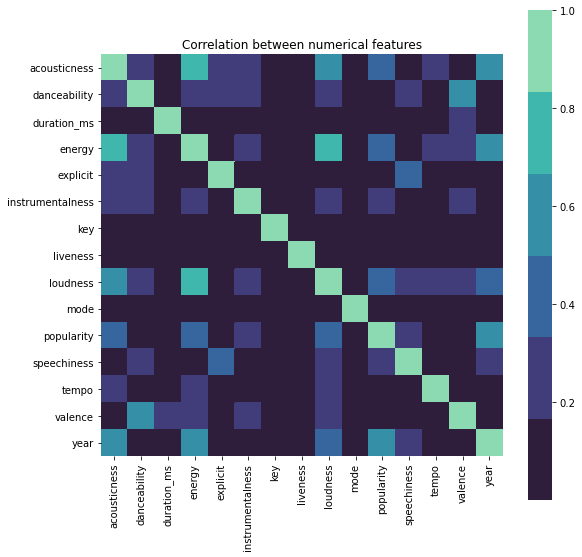

<Figure size 432x288 with 0 Axes>

In [25]:
#correlation between the numerical features 
num_df = pan.DataFrame(data=df, columns=num_columns, index=df.index)
corr = np.abs(num_df.corr())
fig, ax = plt.subplots(figsize=(9, 9))
cmap = sns.color_palette("mako")
sns.heatmap(corr, cmap=cmap, square=True)
plt.title('Correlation between numerical features')
plt.show()
plt.savefig('correlation.png')

In [26]:
#correlation index

features = np.abs(corr['popularity']).sort_values(ascending = False)
print("Linear Features to Popularity")
for i, row in enumerate(features):
    if 0.2 <= row < 1:
        print (f'{features.index[i]:17} {row: 2f}')

Linear Features to Popularity
year               0.549709
acousticness       0.412569
loudness           0.348913
energy             0.343429
instrumentalness   0.295597
speechiness        0.200310


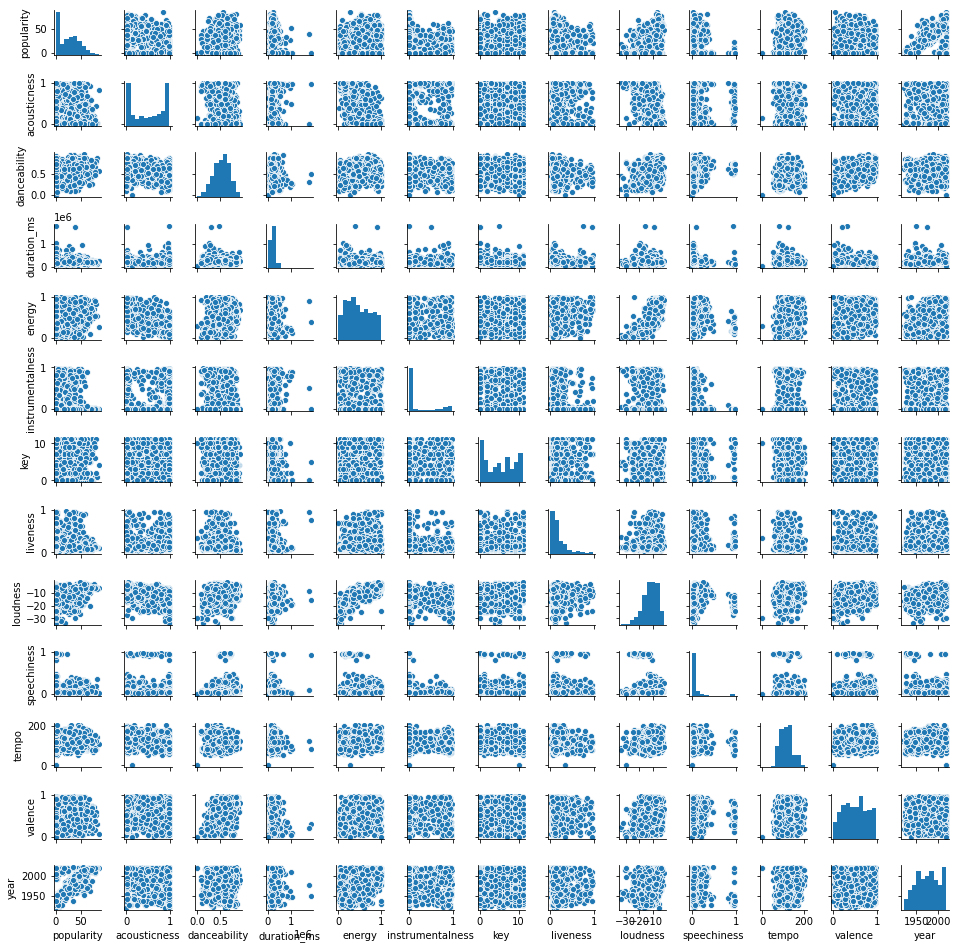

In [27]:
# numerical features
sns_pplot = sns.pairplot(df.sample(1000), height=1, vars=['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'year'])
plt.show()


### Features 

### Artists 

In [28]:
df['artists'].nunique()

36195

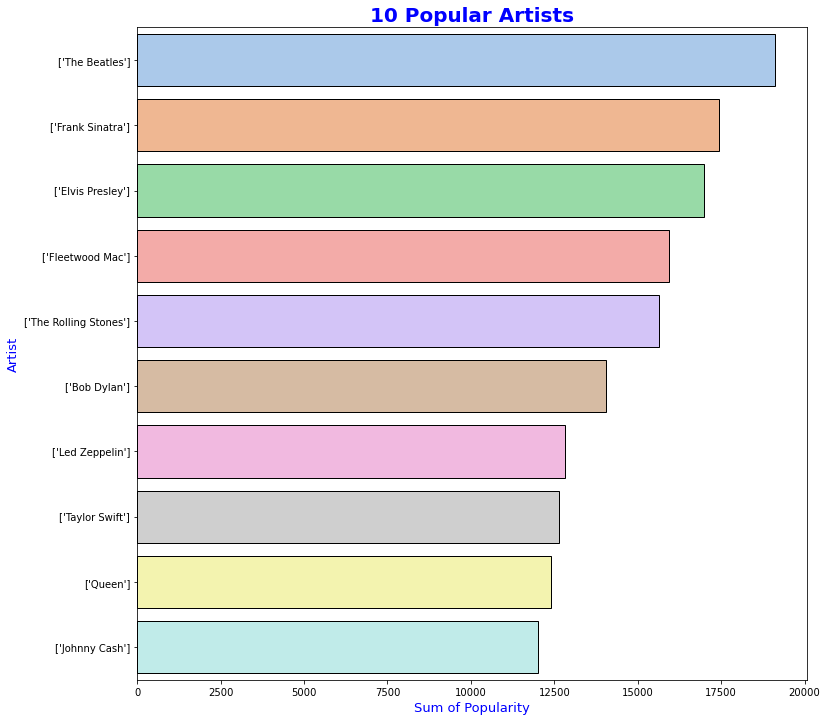

In [29]:
#top 10 artists

fig, ax = plt.subplots(figsize = (12, 12))

artists = df.groupby('artists')['popularity'].sum().sort_values(ascending=False).head(10)

ax = sns.barplot(x=artists.values, y=artists.index, palette="pastel", orient="h", edgecolor='black', ax=ax)


ax.set_xlabel('Sum of Popularity', c='b', fontsize=13)
ax.set_ylabel('Artist', c='b', fontsize=13)
ax.set_title('10 Popular Artists', c='b', fontsize=20, weight = 'bold')

plt.show()

### Explicit - DONE 

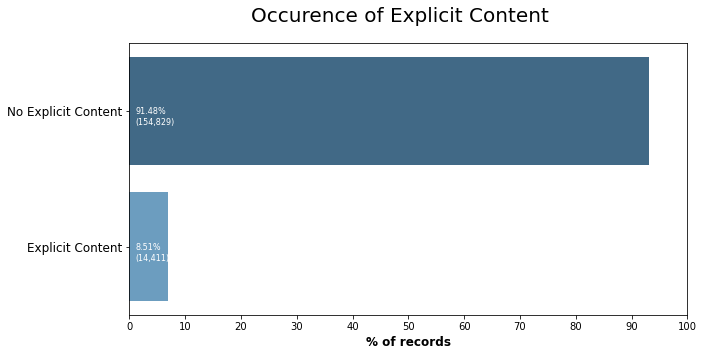

In [44]:
#categorical features: Explicit Content 

fig, ax = plt.subplots(figsize = (10, 5))
y_ticks = ['No Explicit Content', 'Explicit Content']
axis = sns.barplot(x = (df['explicit'].value_counts(normalize=True)*100),
                 y= y_ticks, 
                 data=df, palette='Blues_d')

ax.set_xlabel('% of records', fontsize=12, weight='bold')
ax.set_xlim(0.0,100.0)
ax.set_xticks(ticks=range(0,101,10))


ax.set_yticklabels(labels=y_ticks, fontsize=12)
ax.text(s='91.48%\n(154,829)', x=1, y=0.1, fontdict={ 'weight': 'normal','size': 8,'c':'white'})
ax.text(s='8.51%\n(14,411)', x=1, y=1.1, fontdict={'weight': 'normal','size': 8,'c':'white'})

plt.suptitle('Occurence of Explicit Content', fontsize=20, c='black')
plt.show()

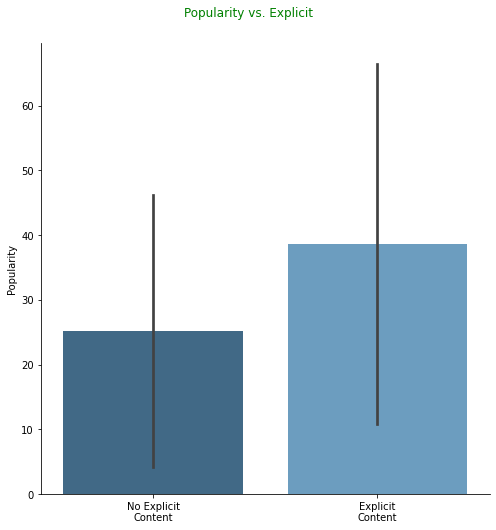

In [45]:
# explicit content vs. popularity 

exp_con = sns.catplot(data=df, kind="bar",
                        x="explicit", y="popularity",
                        ci="sd", palette='Blues_d',
                        height=7)
exp_con.fig.suptitle('Popularity vs. Explicit', y=1.05, c='g')
exp_con.set_axis_labels("", "Popularity")
exp_con.set_xticklabels(['No Explicit\nContent', 'Explicit\nContent'])
plt.show()
plt.show()

#### Key

In [32]:
df['duration_ms'].corr(df['popularity'])

0.028228508117966213

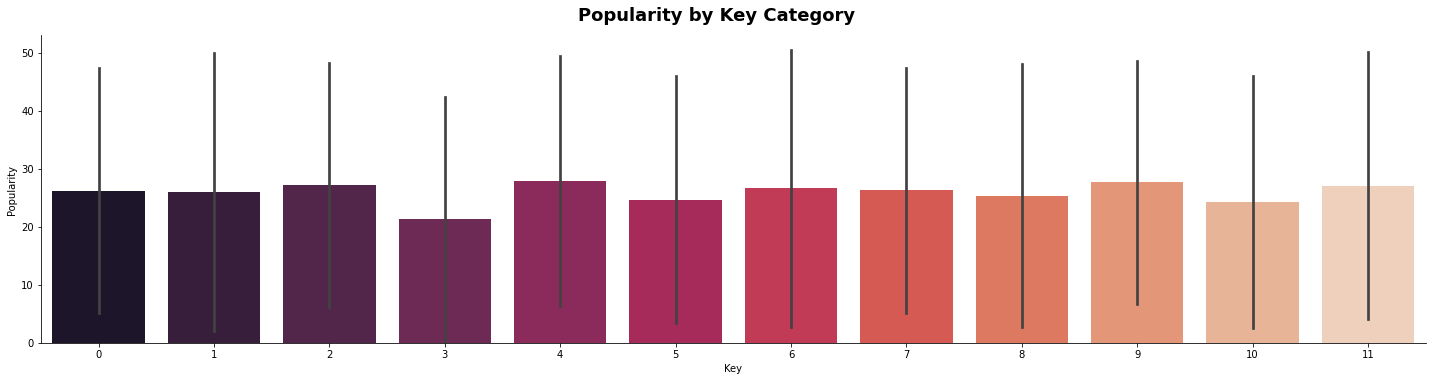

In [59]:
key = sns.catplot(data=df, kind="bar",
                        x="key", y="popularity",
                        palette='rocket',
                        ci = 'sd',
                        height=5, aspect = 4)
key.fig.suptitle('Popularity by Key Category', y=1.05, c='k', weight='bold', fontsize = 18)
key.set_axis_labels("Key", "Popularity")
plt.show()

#### Mode 

In [33]:
# circle graph 

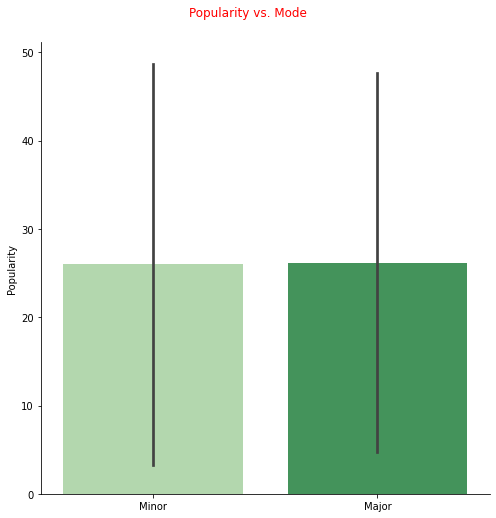

In [34]:
popmode = sns.catplot(data=df, kind="bar",
                        x="mode", y="popularity",
                        ci="sd", palette='Greens',
                        height=7)

popmode.fig.suptitle('Popularity vs. Mode', y=1.05, c='r')
popmode.set_axis_labels("", "Popularity")
popmode.set_xticklabels(['Minor', 'Major'])

plt.show()

In [35]:
a= df['energy'].corr(df['popularity']).round(3)
print(f'The pearson corr is {a:^10}')

The pearson corr is   0.343   


In [36]:
df['energy'].describe()

count    170937.000000
mean          0.480909
std           0.271695
min           0.000000
25%           0.248000
50%           0.462000
75%           0.707000
max           1.000000
Name: energy, dtype: float64

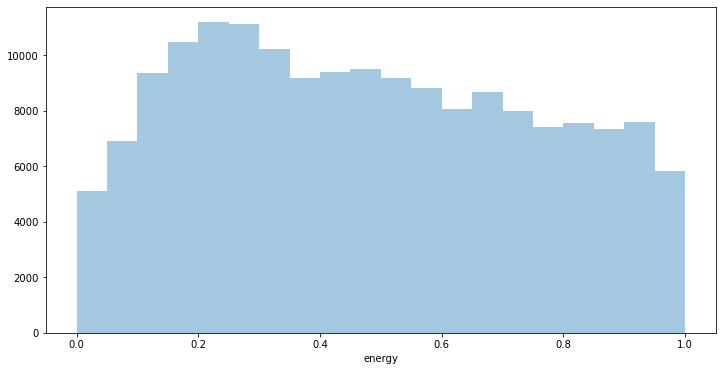

In [37]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.distplot(df['energy'], kde=False, bins=20)
plt.show()

In [39]:
df['popularity'].describe()

count    170937.000000
mean         26.116078
std          21.833785
min           0.000000
25%           2.000000
50%          26.000000
75%          43.000000
max         100.000000
Name: popularity, dtype: float64

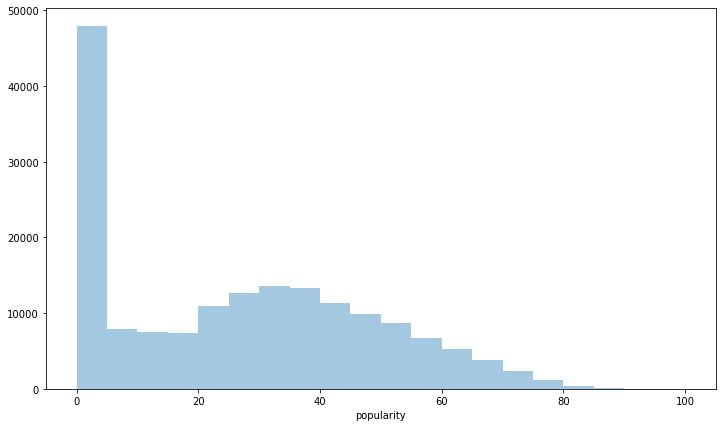

In [41]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.distplot(df['popularity'], kde=False, bins=20)
plt.show()

Danceability 

In [60]:
D = df['danceability'].corr(df['popularity']).round(2)
print(f'The pearדon corr is {D:^10}')

The pearדon corr is    0.13   


In [61]:
df['danceability'].describe()

count    170937.000000
mean          0.536097
std           0.175598
min           0.000000
25%           0.414000
50%           0.547000
75%           0.668000
max           0.988000
Name: danceability, dtype: float64

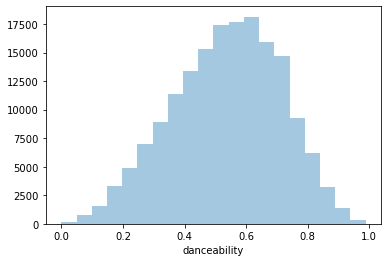

In [63]:
sns.distplot(df['danceability'],kde=False, bins=20)
plt.show()

Year 


In [64]:
a = df['year'].corr(df['popularity']).round(2)
print(f"Linear correlation is {a}")

Linear correlation is 0.55


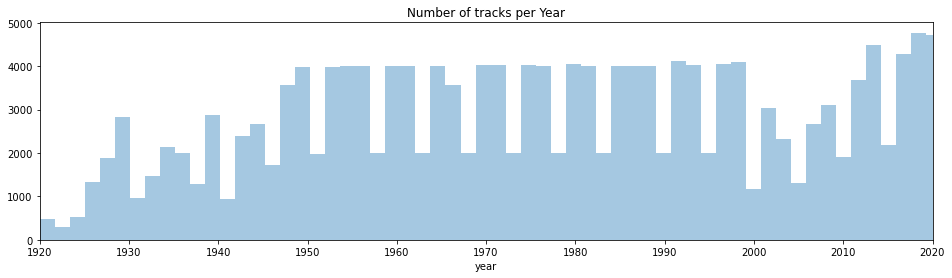

In [77]:
fig, ax = plt.subplots(figsize=(16, 4))
ax = sns.distplot(df['year'], bins = 60, kde = False)

ax.set_xlim(1920,2020)
ax.set_xticks(range(1920, 2021, 10))
ax.set_title('Number of tracks per Year')

plt.show()

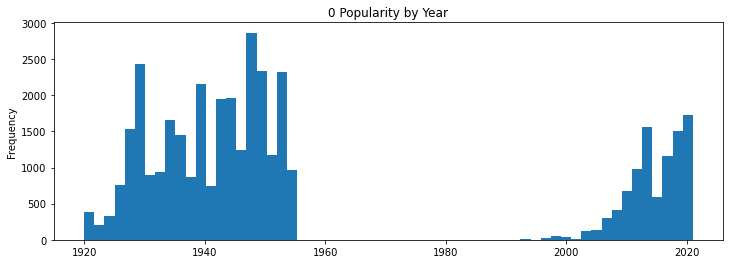

In [70]:
fig, ax = plt.subplots(figsize=(12, 4))
ax = df['year'].loc[df['popularity']==0].plot.hist(bins=60)
ax.set_title('Popularity by Year')

plt.show()

In [79]:
a= df['liveness'].corr(df['popularity']).round(3)
print(f'The pearson corr is {a:^10}')

The pearson corr is   -0.084  


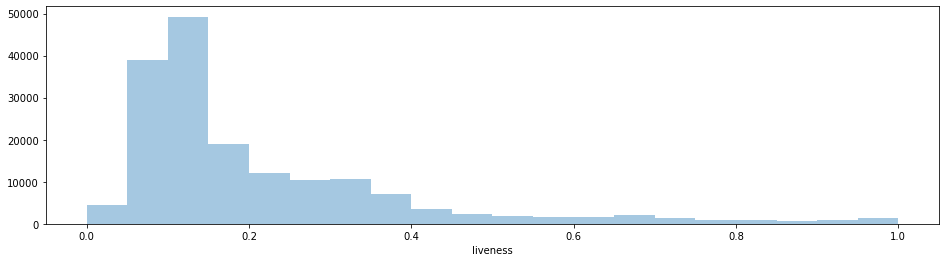

In [82]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.distplot(df['liveness'], kde = False, bins=20)
plt.show()

Loudness - Done 

In [85]:
df['loudness'].corr(df['popularity'])

0.34891340572208546

In [84]:
df['loudness'].describe()

count    170937.000000
mean        -11.774665
std           5.668958
min         -60.000000
25%         -14.921000
50%         -10.871000
75%          -7.547000
max           3.855000
Name: loudness, dtype: float64

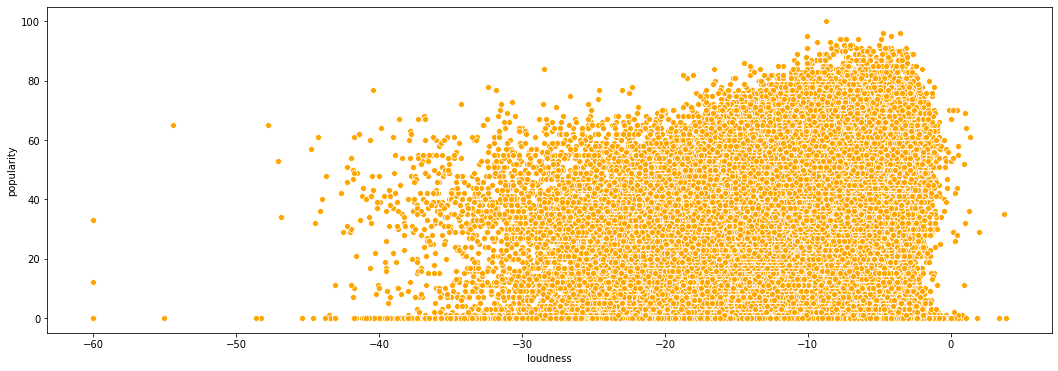

In [91]:
fig, ax = plt.subplots(figsize = (18, 6))
sns.scatterplot(x='loudness', y='popularity', data=df, color='orange', alpha=1)
plt.show()

In [83]:
for i in range(5,-60,-5):
  print(f"There are {df.loc[df['loudness'] < i, 'loudness'].count()} tracks below {i}")

There are 170937 tracks below 5
There are 170906 tracks below 0
There are 157429 tracks below -5
There are 96478 tracks below -10
There are 42131 tracks below -15
There are 15309 tracks below -20
There are 4163 tracks below -25
There are 1244 tracks below -30
There are 349 tracks below -35
There are 84 tracks below -40
There are 15 tracks below -45
There are 9 tracks below -50
There are 7 tracks below -55
